# Vaciado de tanque B = 0.48

### Analicemos la geometría construida anteriormete

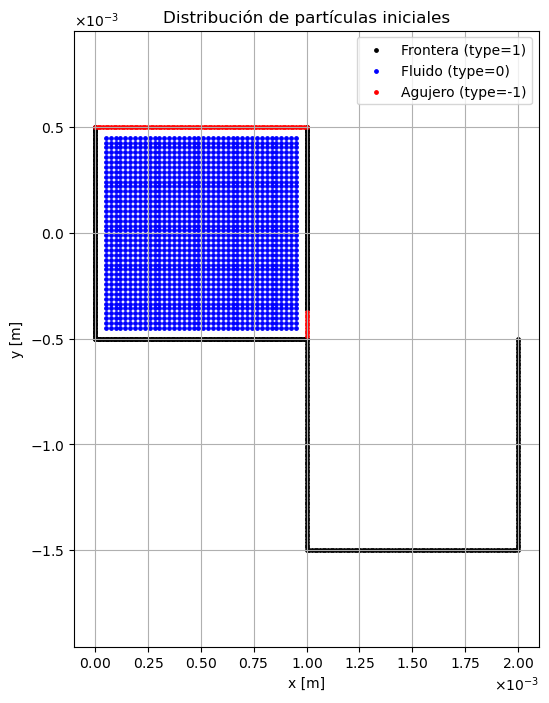

In [2]:
from pathlib import Path
from utils.plot_ics import plot_ics

PROJECT_ROOT = Path().resolve().parent
vaciado = PROJECT_ROOT / "Output" / "init_cond" / "firstVaciadoIC.txt"

plot_ics(vaciado)

Creamos el archivo json correspondiente a esta simulación en una carpeta, siendo este offset de 1.25e-4, con B = 0.48, c = 0.001. Debemos llevarlo hasta 4000 para estabilizarlo y luego abrir las compuertas. Para eso:

1. Construir el params.json asociado a la simulación y su correspondiente carpeta de guardado dentro de los Output.
2. Ejecutar la simulación hasta el paso 4000.

In [3]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="vaciado_estabilizacion4k",
    input_file="Output/init_cond/firstVaciadoIC.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 4000,
    project_root=PROJECT_ROOT
)


✅ Archivo generado: Output/vaciado_estabilizacion4k/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_estabilizacion4k/params.json')

In [4]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "vaciado_estabilizacion4k",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado_estabilizacion4k

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_estabilizacion4k/params.json
[INFO] Configurada EoS Adami con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2389 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2390 partículas desde el archivo Output/init_cond/firstVaciadoIC.txt

[particleSummary] Número total de partículas: 2390
Fluido: 1600, Ancho: 0.0009, Altura: 0.0009
Frontera: 790, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsBruteForce] Buscando vecinos (Fuerza Bruta)...
Total partículas: 2390, Fluid

In [4]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_ROOT = f"{PROJECT_ROOT}/Output/vaciado_estabilizacion4k/Output/state_0000.txt"
print(BASE_ROOT)

/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_estabilizacion4k/Output/state_0000.txt


In [5]:

generar_script_gnuplot(BASE_ROOT, lim=3999, retardo=0.001, nombre_salida="vaciado_est4k.gp")

✅ Script Gnuplot generado correctamente: vaciado_est4k.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–230 (231 partículas)
  Tipo -1: líneas 231–321 (91 partículas)
  Tipo 1: líneas 322–789 (468 partículas)
  Tipo 0: líneas 790–2389 (1600 partículas)


Usamos el último estado calculado para vaciado estabilización, le borramos todas las partículas que tienen type = -1. Y usamos este como condiciones iniciales de la salida de agua.

In [6]:
new_ics = PROJECT_ROOT / "Output" / "vaciado_estabilizacion4k" / "Output" / "state_3999.txt"

import pandas as pd

# Cargar archivo (usa el nombre correcto)
df = pd.read_csv(str(new_ics), delim_whitespace=True)

# Eliminar filas donde type == -1
df = df[df["type"] != -1]

print(df)


        id      posx      posy      velx      vely    accelx    accely  \
0        0  0.000000  0.000500  0.000000  0.000000  0.000000  0.000000   
1        1  0.000000  0.000487  0.000000  0.000000  0.000000  0.000000   
2        2  0.000000  0.000475  0.000000  0.000000  0.000000  0.000000   
3        3  0.000000  0.000463  0.000000  0.000000  0.000000  0.000000   
4        4  0.000000  0.000450  0.000000  0.000000  0.000000  0.000000   
...    ...       ...       ...       ...       ...       ...       ...   
2385  2385  0.000796  0.000225 -0.000092  0.001523  0.121852 -0.212736   
2386  2386  0.000814  0.000227 -0.000109  0.001500 -0.044043 -0.200932   
2387  2387  0.000831  0.000229 -0.000065  0.001453  0.065674 -0.295158   
2388  2388  0.000875  0.000228  0.000076  0.001206  0.191105 -0.296465   
2389  2389  0.000901  0.000228  0.000112  0.001000  0.125717 -0.288362   

              rho          mass  pressure         h  internalE  type  
0     1000.000000  6.250000e-07  0.00000

/tmp/ipykernel_5467/445791806.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(str(new_ics), delim_whitespace=True)


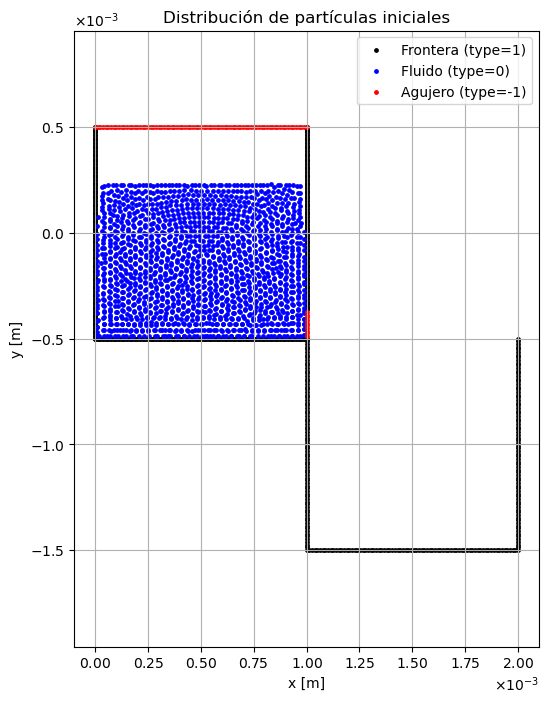

In [7]:
from utils.plot_ics import plot_ics

plot_ics(new_ics)

In [8]:
if (df["type"] == -1).any():
    print("Aún quedan filas con type == -1")
else:
    print("Verificación OK: no queda ninguna fila con type == -1")

Verificación OK: no queda ninguna fila con type == -1


In [9]:
# ---- Ruta donde guardar ----
nombre_archivo = "vaciado_caida4k.txt"

ruta_salida = PROJECT_ROOT / "Output" / "init_cond" / nombre_archivo
# ---- Guardado con formateo EXACTO ----
with open(ruta_salida, "w") as f:
    
    # Escribir cabecera
    f.write("id posx posy velx vely accelx accely rho mass pressure h internalE type\n")
    
    # Escribir cada fila con formateo específico
    for _, row in df.iterrows():
        f.write(
            f"{int(row['id'])} "
            f"{row['posx']:.10f} "
            f"{row['posy']:.10f} "
            f"{row['velx']:.10f} "
            f"{row['vely']:.10f} "
            f"{row['accelx']:.10f} "
            f"{row['accely']:.10f} "
            f"{row['rho']:.10f} "
            f"{row['mass']:.10f} "
            f"{row['pressure']:.10f} "
            f"{row['h']:.10f} "
            f"{row['internalE']:.10f} "
            f"{int(row['type'])}\n"
        )

print("Archivo guardado en:", ruta_salida)

Archivo guardado en: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/init_cond/vaciado_caida4k.txt


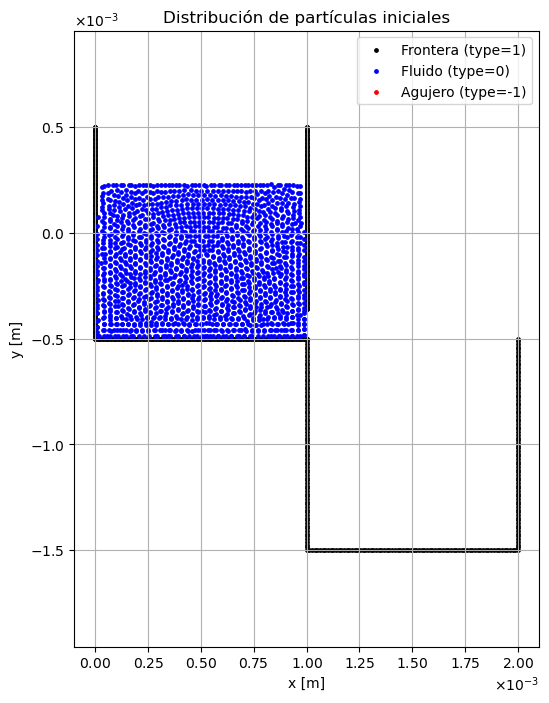

In [16]:
new_ics_open = PROJECT_ROOT / "Output" / "init_cond" / "vaciado_caida4k.txt"


plot_ics(new_ics_open)

In [14]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="vaciado_caida4k",
    input_file="Output/init_cond/vaciado_caida4k.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 12000,
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado_caida4k/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_caida4k/params.json')

In [15]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "vaciado_caida4k",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=12000
)


🚀 Ejecutando simulación: vaciado_caida4k

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_caida4k/params.json
[INFO] Configurada EoS Adami con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2389 pos: (0.000901361, 0.000227997)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2299 partículas desde el archivo Output/init_cond/vaciado_caida4k.txt

[particleSummary] Número total de partículas: 2299
Fluido: 1600, Ancho: 0.000978513, Altura: 0.000718185
Frontera: 699, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsBruteForce] Buscando vecinos (Fuerza Bruta)...
Total partículas: 2299, Flui

In [16]:
CAIDA_ROOT = f"{PROJECT_ROOT}/Output/vaciado_caida4k/Output/state_0000.txt"
print(CAIDA_ROOT)

/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/FloodSPH/Output/vaciado_caida4k/Output/state_0000.txt


In [17]:
generar_script_gnuplot(CAIDA_ROOT, lim=11999, retardo=0.001, nombre_salida="vaciado_caida4k.gp")

✅ Script Gnuplot generado correctamente: vaciado_caida4k.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–698 (699 partículas)
  Tipo 0: líneas 699–2298 (1600 partículas)


5. Creamos el nuevo .txt con las condiciones inciales usando una salida más grande.